#### Описание датасета:

Выборка из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах

- `id`: идентификатор записи;
- `url`: URL записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `condition`: состояние;
- `cylinders`: количество цилиндров;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `VIN`: идентификационный номер;
- `drive`: тип привода;
- `size`: размер;
- `type`: кузов;
- `paint_color`: цвет;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `county`: страна;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены.


**Задача:** <br><br>
Построить модель классификации, определяющую категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства

### Data Preparation

In [683]:
import pandas as pd
import matplotlib.pyplot as plt

In [684]:
df = pd.read_csv('data/vehicles_dataset.csv', sep=',')
df.shape

(10050, 27)

In [685]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,price_category
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,good,NaN,...,pickup,silver,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,6 cylinders,...,SUV,black,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,NaN,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,good,NaN,...,sedan,NaN,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,NaN,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,NaN,NaN,...,wagon,white,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,NaN,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,new,4 cylinders,...,NaN,NaN,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,NaN,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium


In [686]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10050 non-null  int64  
 1   url             10050 non-null  object 
 2   region          10050 non-null  object 
 3   region_url      10050 non-null  object 
 4   price           10050 non-null  int64  
 5   year            10014 non-null  float64
 6   manufacturer    9665 non-null   object 
 7   model           9921 non-null   object 
 8   condition       6268 non-null   object 
 9   cylinders       5953 non-null   object 
 10  fuel            9987 non-null   object 
 11  odometer        10007 non-null  float64
 12  title_status    9884 non-null   object 
 13  transmission    10005 non-null  object 
 14  VIN             6086 non-null   object 
 15  drive           7026 non-null   object 
 16  size            2825 non-null   object 
 17  type            7845 non-null  

In [687]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date', 'price_category'],
      dtype='object')

In [688]:
df[['price', 'year', 'odometer', 'lat', 'long']].describe()

,price,year,odometer,lat,long
count,1.005000e+04,10014.000000,1.000700e+04,9951.000000,9951.000000
mean,2.068429e+04,2010.917815,9.565719e+04,38.590164,-94.161564
std,1.243216e+05,9.697849,8.657948e+04,5.844756,18.123096
min,5.000000e+02,1915.000000,0.000000e+00,-67.144243,-158.069300
25%,7.900000e+03,2008.000000,3.899450e+04,34.830000,-110.447150
50%,1.574950e+04,2013.000000,8.837700e+04,39.285100,-87.999100
75%,2.799000e+04,2017.000000,1.370000e+05,42.427590,-80.830000
max,1.234568e+07,2022.000000,3.245000e+06,64.947500,173.885502


In [689]:
df[['url', 'region', 'region_url', 'manufacturer',
    'model', 'condition', 'cylinders', 'fuel', 'title_status',
    'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
    'image_url', 'description', 'state',
    'posting_date', 'price_category']].describe()

,url,region,region_url,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,posting_date,price_category
count,10050,10050,10050,9665,9921,6268,5953,9987,9884,10005,6086,7026,2825,7845,7087,10048,10048,10050,10048,10050
unique,10000,393,405,39,3466,6,8,5,6,3,5429,3,4,13,12,9081,9845,51,9957,3
top,https://roswell.craigslist.org/cto/d/artesia-1...,"kansas city, MO",https://kansascity.craigslist.org,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,PLEASE VIEW THE FREE CARFAX HISTORY REPORT AT ...,ca,2021-04-13T09:11:02-0500,high
freq,2,86,86,1647,151,3134,2288,8447,9568,7737,10,3054,1476,1981,1916,191,7,1113,3,3514


In [690]:
print('Количество уникальных значений в признаках:')
df.nunique()

Количество уникальных значений в признаках:


id                10000
url               10000
region              393
region_url          405
price              2227
year                 89
manufacturer         39
model              3466
condition             6
cylinders             8
fuel                  5
odometer           7006
title_status          6
transmission          3
VIN                5429
drive                 3
size                  4
type                 13
paint_color          12
image_url          9081
description        9845
county                0
state                51
lat                5049
long               5082
posting_date       9957
price_category        3
dtype: int64

In [691]:
print('Доля вхождения в выборку для каждого значения целевой переменной')
counts = df.price_category.value_counts()
percentage = df.price_category.value_counts(normalize=True).mul(100).round(2).astype(str) + ' %'
pd.concat([counts,percentage], axis=1, keys=['count', 'percentage'])

Доля вхождения в выборку для каждого значения целевой переменной


,count,percentage
high,3514,34.97 %
medium,3294,32.78 %
low,3242,32.26 %


Данные по ценовым категориям распределены нормально


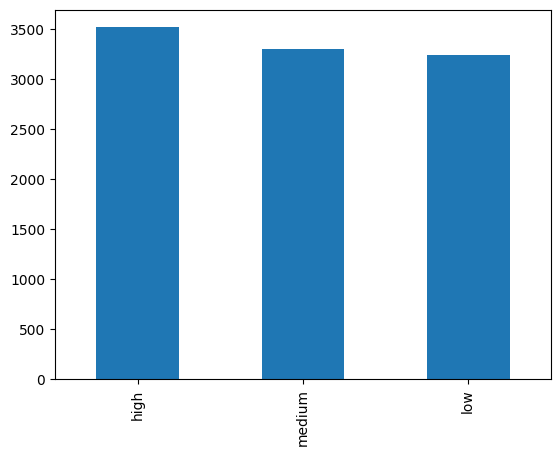

In [692]:
print('Данные по ценовым категориям распределены нормально')
counts.plot(kind='bar');

### Data Cleaning

In [693]:
print('Дублирующиеся строки')
df[df.duplicated()]

Дублирующиеся строки


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,price_category
1326,7312641615,https://pueblo.craigslist.org/cto/d/pueblo-196...,pueblo,https://pueblo.craigslist.org,6500,1969.0,chevrolet,c10,good,8 cylinders,...,NaN,red,https://images.craigslist.org/00f0f_kmR1TNWM4O...,"1969 C10 runs and drives clean body, needs inn...",NaN,co,38.032300,-104.716000,2021-04-25T20:15:43-0600,low
2159,7312437164,https://yakima.craigslist.org/ctd/d/parker-201...,yakima,https://yakima.craigslist.org,19995,2015.0,subaru,xv crosstrek,NaN,4 cylinders,...,SUV,white,https://images.craigslist.org/01414_cBd43F8IeC...,2015 Subaru XV Crosstrek 2.0i Limited AWD 4dr ...,NaN,wa,46.553190,-120.475680,2021-04-25T11:30:27-0700,medium
2398,7316719393,https://miami.craigslist.org/mdc/ctd/d/miami-2...,south florida,https://miami.craigslist.org,25590,2018.0,volkswagen,golf gti s hatchback,good,NaN,...,sedan,blue,https://images.craigslist.org/00y0y_7qosBCrp0z...,Carvana is the safer way to buy a car During t...,NaN,fl,25.770000,-80.200000,2021-05-04T11:01:11-0400,high
3067,7307971804,https://redding.craigslist.org/ctd/d/sacrament...,redding,https://redding.craigslist.org,8800,2008.0,honda,accord,excellent,NaN,...,sedan,silver,https://images.craigslist.org/00S0S_kT52djO80H...,2008 *** Honda Accord EX L w/Navi 4dr Sedan 5A...,NaN,ca,38.608824,-121.400837,2021-04-16T15:01:16-0700,low
3236,7307083381,https://westernmass.craigslist.org/ctd/d/sprin...,western massachusetts,https://westernmass.craigslist.org,21990,2017.0,gmc,acadia sle-1 sport utility,good,NaN,...,SUV,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,ma,42.110000,-72.530000,2021-04-15T06:10:54-0400,medium
3458,7316793777,https://desmoines.craigslist.org/ctd/d/martens...,des moines,https://desmoines.craigslist.org,6700,2015.0,ford,fusion se,good,4 cylinders,...,NaN,NaN,https://images.craigslist.org/00S0S_3wmNGwLyaE...,"2015 Ford Fusion SE, 2.5 4 cyl. automatic, air...",NaN,ia,41.373000,-93.735800,2021-05-04T11:59:42-0500,low
3547,7313511076,https://athensohio.craigslist.org/ctd/d/athens...,athens,https://athensohio.craigslist.org,23590,2012.0,ford,f150 supercrew cab xlt,good,8 cylinders,...,pickup,white,https://images.craigslist.org/00J0J_4mfUGXkpYW...,Carvana is the safer way to buy a car During t...,NaN,oh,39.320000,-82.090000,2021-04-27T16:10:50-0400,high
3635,7314807085,https://oklahomacity.craigslist.org/ctd/d/norm...,oklahoma city,https://oklahomacity.craigslist.org,35988,2018.0,chevrolet,traverse premier,like new,NaN,...,NaN,NaN,https://images.craigslist.org/00i0i_4adOkOM7Vm...,THIS 2018 CHEVROLET TRAVERSE WAS JUST TRADED I...,NaN,ok,35.199000,-97.484100,2021-04-30T10:02:34-0500,high
3726,7311813732,https://youngstown.craigslist.org/ctd/d/struth...,youngstown,https://youngstown.craigslist.org,3000,2006.0,pontiac,grand prix,NaN,NaN,...,NaN,NaN,https://images.craigslist.org/00W0W_aE2NBfU8gr...,2007 PONTIAC GRAND PRIX. GOOD CONDITION IN & O...,NaN,oh,41.023719,-80.594793,2021-04-24T09:42:34-0400,low
3756,7308232496,https://raleigh.craigslist.org/ctd/d/raleigh-2...,raleigh / durham / CH,https://raleigh.craigslist.org,28990,2018.0,gmc,acadia sle-2 sport utility,good,6 cylinders,...,SUV,NaN,https://images.craigslist.org/00I0I_luAr8SgpD6...,Carvana is the safer way to buy a car During t...,NaN,nc,35.820000,-78.650000,2021-04-17T10:51:25-0400,high


In [694]:
df = df.drop_duplicates()
df.shape

(10000, 27)

In [695]:
import missingno as msno

Заполненность признаков


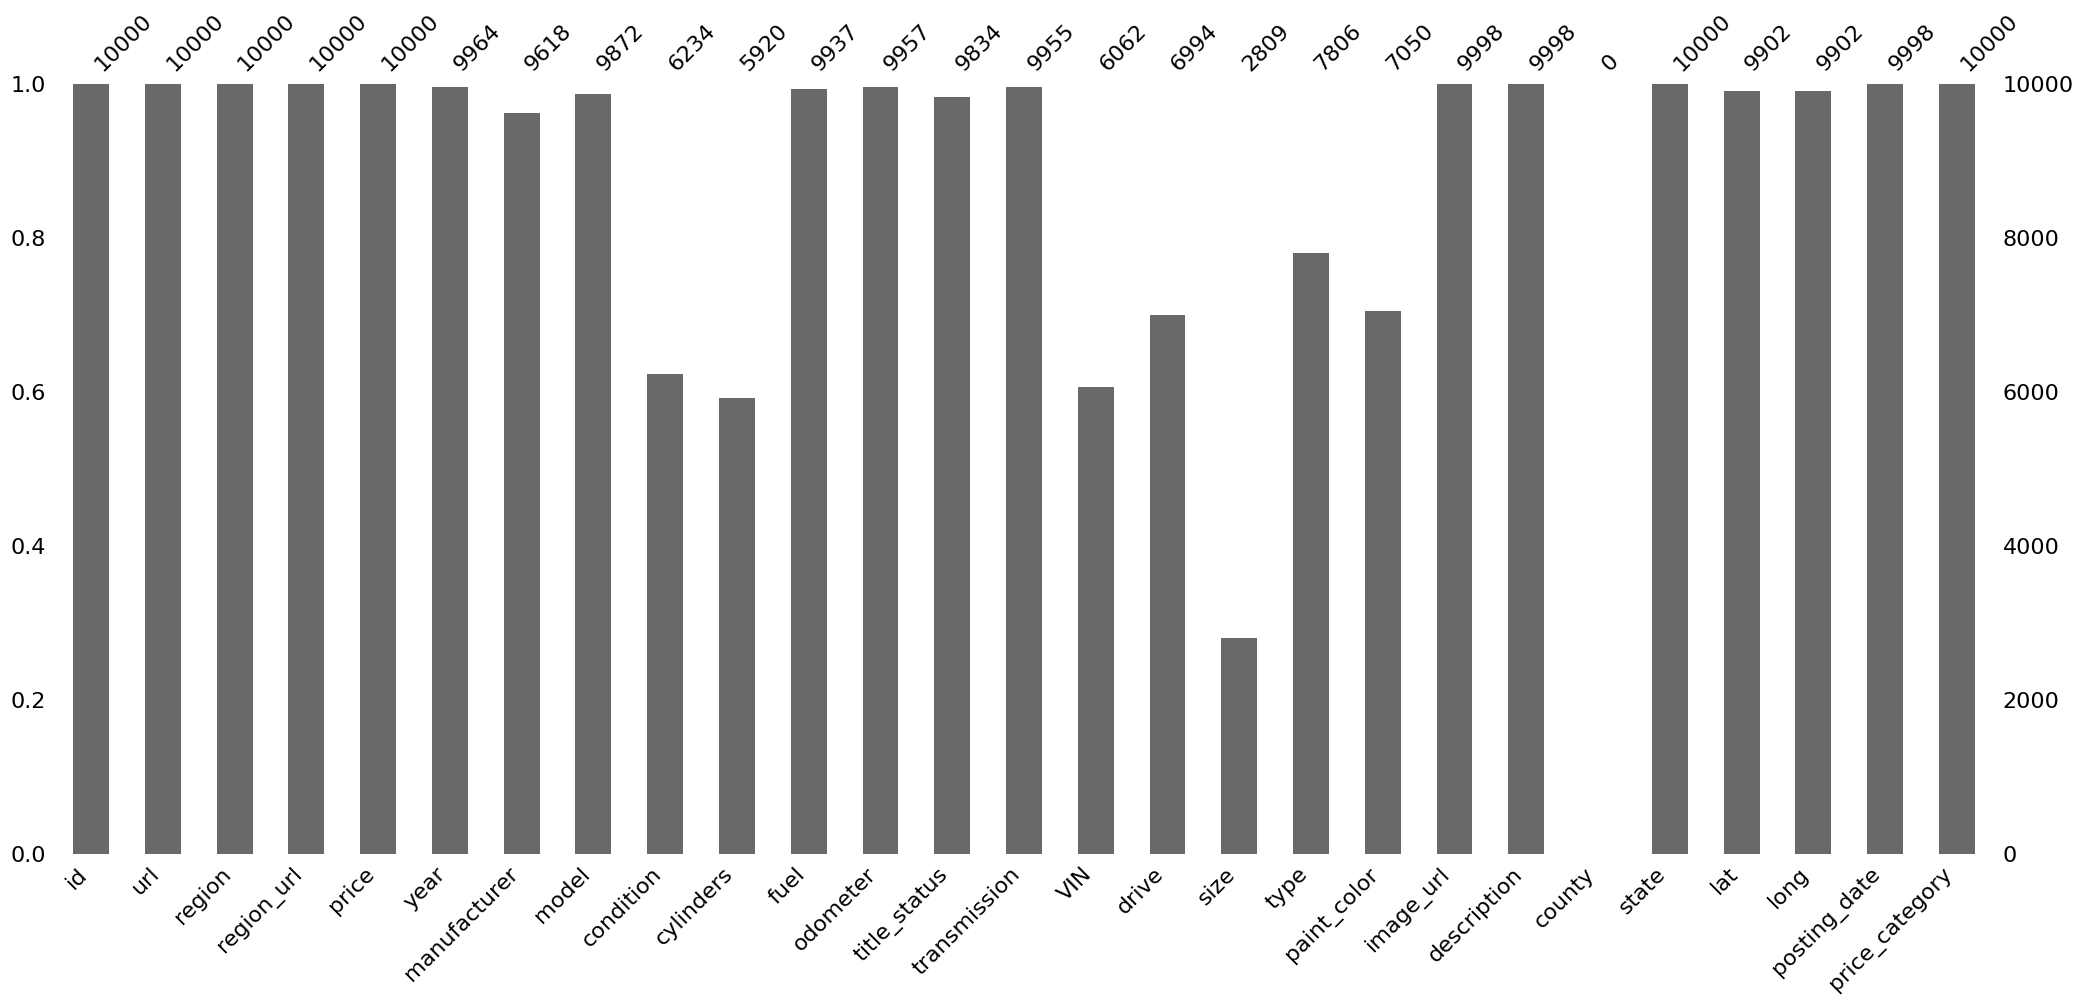

In [696]:
print('Заполненность признаков')
msno.bar(df);

Матрица пропусков


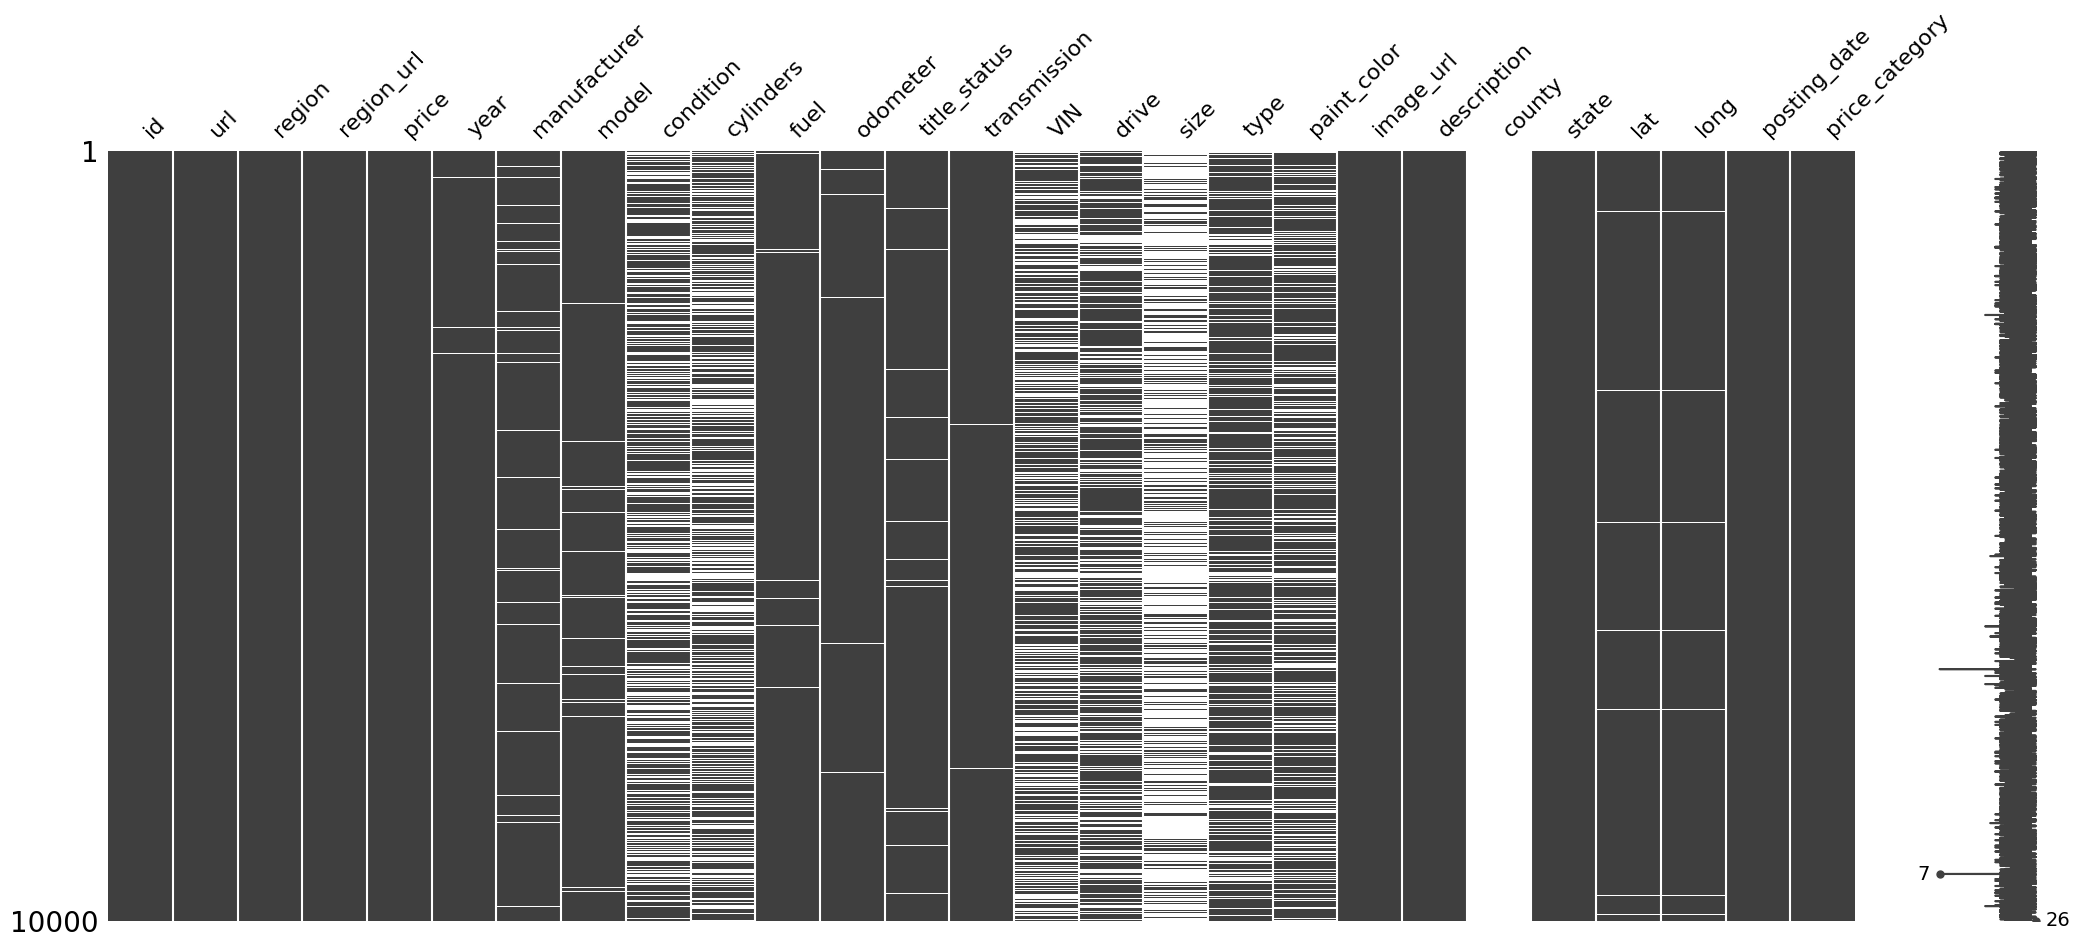

In [697]:
print('Матрица пропусков')
msno.matrix(df);

In [698]:
missing_values = ((df.isna().sum() / len(df)) * 100).sort_values()

print('Процент пропущенных значений:')
missing_values

Процент пропущенных значений:


id                  0.00
state               0.00
price               0.00
price_category      0.00
region              0.00
url                 0.00
region_url          0.00
description         0.02
image_url           0.02
posting_date        0.02
year                0.36
odometer            0.43
transmission        0.45
fuel                0.63
lat                 0.98
long                0.98
model               1.28
title_status        1.66
manufacturer        3.82
type               21.94
paint_color        29.50
drive              30.06
condition          37.66
VIN                39.38
cylinders          40.80
size               71.91
county            100.00
dtype: float64

In [699]:
df_clean = df.copy()

In [700]:
df_clean = df_clean.drop(columns=['county'])

In [701]:
def print_useful_rows_info(df):
    print('Количество полностью заполненных объектов из всей выборки:', 
          len(df.dropna()))
    print('Процент полностью заполненных объектов из всей выборки:', 
          round(len(df.dropna()) / len(df) * 100, 2))
    

print_useful_rows_info(df_clean)

Количество полностью заполненных объектов из всей выборки: 823
Процент полностью заполненных объектов из всей выборки: 8.23


In [702]:
df_clean = df_clean.drop(columns=['VIN', 'condition', 'cylinders', 'size', 'drive', 'paint_color', 'type'])

In [703]:
print_useful_rows_info(df_clean)

Количество полностью заполненных объектов из всей выборки: 9134
Процент полностью заполненных объектов из всей выборки: 91.34


In [704]:
print('Количество значений в столбце manufacturer')
df_clean['manufacturer'].value_counts(dropna=False)

Количество значений в столбце manufacturer


ford               1638
chevrolet          1293
toyota              779
jeep                490
honda               466
nissan              454
ram                 411
NaN                 382
gmc                 358
bmw                 330
dodge               325
volkswagen          251
mercedes-benz       239
hyundai             225
subaru              210
kia                 200
audi                200
lexus               184
cadillac            183
chrysler            161
acura               150
buick               145
mazda               142
infiniti            117
lincoln             113
mitsubishi           82
mini                 72
volvo                67
pontiac              61
rover                59
jaguar               45
porsche              37
mercury              32
tesla                27
saturn               25
fiat                 23
alfa-romeo           14
ferrari               4
harley-davidson       4
datsun                2
Name: manufacturer, dtype: int64

In [705]:
print('Строки с незаполненными значениями в manufacturer')
df_clean[df_clean['manufacturer'].isna()][['manufacturer', 'model', 'description']]

Строки с незаполненными значениями в manufacturer


,manufacturer,model,description
21,NaN,oldsmobile 442,1970 Oldsmobile 442 Convertible 442 Indy Pace ...
66,NaN,Diahatsu,1991 Daihatsu hijet 5 speed extended cab....im...
182,NaN,Scion iM Hatchback 4D,Carvana is the safer way to buy a car During t...
201,NaN,Voltswagon Beetle,"New Brakes, new serpentine belt, new catalytic..."
217,NaN,THOMAS SCHOOL BUS,5.9 CUMMINS DIESEL; 28 Passenger with 2 Rear A...
...,...,...,...
9908,NaN,Scion xD Hatchback 4D,Carvana is the safer way to buy a car During t...
9959,NaN,FREIGHTLINER M2 106,"2013 *FREIGHTLINER* *M2 106* M2106 - $24,900Ca..."
9985,NaN,Suzuki Grand Vitara,"2012 Suzuki Grand Vitara Premium 4WD - $7,450 ..."
10002,NaN,F-150,2020 *Ford* *F-150* 180 MILES. LIFTED FORD F15...


In [706]:
df_clean['manufacturer'] = df_clean['manufacturer'].fillna('other')
print('Количество пропущенных значений в manufacturer:', df_clean['manufacturer'].isna().sum())

Количество пропущенных значений в manufacturer: 0


In [707]:
print('Количество значений в столбце odometer')
df_clean['odometer'].value_counts(dropna=False)

Количество значений в столбце odometer


100000.0    50
NaN         43
1.0         42
180000.0    37
200000.0    37
            ..
32086.0      1
126872.0     1
68967.0      1
124248.0     1
61943.0      1
Name: odometer, Length: 7007, dtype: int64

In [708]:
print('Строки с незаполненными значениями в odometer')
df_clean[df_clean['odometer'].isna()]

Строки с незаполненными значениями в odometer


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category
240,7306504389,https://bakersfield.craigslist.org/ctd/d/fresn...,bakersfield,https://bakersfield.craigslist.org,29998,2016.0,lexus,nx,gas,NaN,clean,automatic,https://images.craigslist.org/00r0r_7hJfyJGBZb...,2016 *** Lexus NX 200t F Sport SUV *** Read...,ca,36.837679,-119.809638,2021-04-13T19:15:45-0700,high
341,7313513841,https://albuquerque.craigslist.org/ctd/d/albuq...,albuquerque,https://albuquerque.craigslist.org,27495,2011.0,cadillac,cts-v coupe,gas,NaN,clean,automatic,https://images.craigslist.org/00W0W_aQNTz1yato...,2011 *** Cadillac CTS-V Coupe 2dr Cpe Coupe **...,nm,35.087703,-106.579999,2021-04-27T14:15:30-0600,high
400,7315580028,https://fresno.craigslist.org/ctd/d/north-holl...,fresno / madera,https://fresno.craigslist.org,28995,2017.0,chevrolet,silverado 1500,gas,NaN,clean,automatic,https://images.craigslist.org/00U0U_dTBRu7M6xI...,2017 Chevrolet Silverado 1500 2WD Double Cab 1...,ca,34.190040,-118.387533,2021-05-01T17:03:13-0700,high
564,7314899346,https://fresno.craigslist.org/ctd/d/fresno-201...,fresno / madera,https://fresno.craigslist.org,44598,2018.0,mercedes-benz,e-class,gas,NaN,clean,automatic,https://images.craigslist.org/00000_8QIFfftsxf...,Drive it home today. Call (Or Text) us now !!C...,ca,36.837679,-119.809638,2021-04-30T10:33:51-0700,high
933,7313530642,https://bakersfield.craigslist.org/ctd/d/fresn...,bakersfield,https://bakersfield.craigslist.org,33898,2015.0,other,Maserati Ghibli,gas,NaN,clean,automatic,https://images.craigslist.org/00a0a_WtMWXlB7ek...,2015 *** Maserati Ghibli S Q4 Sedan *** Rea...,ca,36.837679,-119.809638,2021-04-27T13:45:52-0700,high
1566,7314651593,https://bend.craigslist.org/ctd/d/gladstone-20...,bend,https://bend.craigslist.org,11985,2006.0,honda,pilot,gas,NaN,clean,automatic,https://images.craigslist.org/01313_dba0iHoXBW...,2006 Honda Pilot EX L w/DVD 4dr SUV 4WD SUV ...,or,45.374861,-122.602289,2021-04-29T19:19:17-0700,medium
1729,7316459394,https://yakima.craigslist.org/ctd/d/yakima-201...,yakima,https://yakima.craigslist.org,6999,2012.0,jeep,liberty,gas,NaN,clean,automatic,https://images.craigslist.org/00J0J_kF1MimeKNG...,2012 *** JEEP LIBERTY SPORT SUV *** Ready T...,wa,46.584837,-120.508958,2021-05-03T15:00:47-0700,low
1854,7310422912,https://yubasutter.craigslist.org/ctd/d/sacram...,yuba-sutter,https://yubasutter.craigslist.org,9988,2015.0,volkswagen,beetle - new tires - leather and heated seats -,gas,NaN,clean,automatic,https://images.craigslist.org/00G0G_5sshuwwxzJ...,Drive it home today. Call (Or Text) us now !!C...,ca,38.589200,-121.405700,2021-04-21T10:31:39-0700,medium
1903,7308735851,https://charlotte.craigslist.org/ctd/d/mount-m...,charlotte,https://charlotte.craigslist.org,12250,2016.0,toyota,scion tc,gas,NaN,clean,manual,https://images.craigslist.org/00t0t_5mwiKHrm7n...,2016 Scion tC Sports Coupe 6-Spd MT Offere...,nc,35.589154,-80.832039,2021-04-18T11:01:47-0400,medium
2130,7302733118,https://harrisburg.craigslist.org/ctd/d/brockp...,harrisburg,https://harrisburg.craigslist.org,14700,2016.0,ford,fusion,NaN,NaN,NaN,NaN,https://images.craigslist.org/00O0O_fkFRDDi4yq...,Car Starz Call Sales at 717-401-4221 2016 Ford...,pa,41.261540,-78.704520,2021-04-06T14:39:29-0400,medium


In [709]:
df_clean['odometer'] = df_clean['odometer'].fillna(int(df_clean['odometer'].mean()))
print('Количество пропущенных значений в odometer:', df_clean['odometer'].isna().sum())

Количество пропущенных значений в odometer: 0


In [710]:
print('Количество значений в столбце posting_date')
df_clean.posting_date.value_counts(dropna=False)

Количество значений в столбце posting_date


2021-04-19T10:00:54-0400    2
2021-04-13T09:11:02-0500    2
2021-04-11T11:11:05-0400    2
2021-04-08T10:06:02-0500    2
2021-04-29T21:11:29-0400    2
                           ..
2021-04-05T18:13:07-0400    1
2021-04-26T13:32:07-0400    1
2021-05-04T14:01:18-0400    1
2021-04-24T11:40:55-0700    1
2021-04-24T13:50:49-0400    1
Name: posting_date, Length: 9958, dtype: int64

In [711]:
print('Количество пропущенных значений в posting_date:', df_clean.posting_date.isna().sum())

Количество пропущенных значений в posting_date: 2


In [712]:
df_clean.posting_date.describe()

count                         9998
unique                        9957
top       2021-04-19T10:00:54-0400
freq                             2
Name: posting_date, dtype: object

In [713]:
print('Строки с незаполненными значениями в posting_date')
df_clean[df_clean['posting_date'].isna()]

Строки с незаполненными значениями в posting_date


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category
6755,7315259025,https://nh.craigslist.org/cto/d/manchester-201...,new hampshire,https://nh.craigslist.org,3750,NaN,other,NaN,NaN,95674.0,NaN,NaN,NaN,NaN,nh,NaN,NaN,NaN,low
9430,7208549803,https://bellingham.craigslist.org/ctd/d/bellin...,bellingham,https://bellingham.craigslist.org,11999,NaN,other,NaN,NaN,95674.0,NaN,NaN,NaN,NaN,wa,NaN,NaN,NaN,medium


In [714]:
df_clean = df_clean[df_clean.posting_date.notna()]
print('Количество пропущенных значений в posting_date:', df_clean.posting_date.isna().sum())

Количество пропущенных значений в posting_date: 0


In [715]:
print('Количество значений в столбце transmission')
df_clean.transmission.value_counts(dropna=False)

Количество значений в столбце transmission


automatic    7700
other        1624
manual        631
NaN            43
Name: transmission, dtype: int64

In [716]:
df_clean.transmission.describe()

count          9955
unique            3
top       automatic
freq           7700
Name: transmission, dtype: object

In [717]:
print('Строки с незаполненными значениями в transmission')
df_clean[df_clean.transmission.isna()]

Строки с незаполненными значениями в transmission


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category
111,7305109580,https://grandrapids.craigslist.org/ctd/d/comst...,grand rapids,https://grandrapids.craigslist.org,12750,2013.0,lexus,es,gas,109382.0,clean,NaN,https://images.craigslist.org/00n0n_kACT1l7OCN...,2013 Lexus ES 350 4dr Sdn Offered by: Auto...,mi,43.059210,-85.688970,2021-04-11T09:41:58-0400,medium
112,7314951119,https://southjersey.craigslist.org/ctd/d/chest...,south jersey,https://southjersey.craigslist.org,18199,2012.0,jeep,wrangler,other,130174.0,clean,NaN,https://images.craigslist.org/00I0I_gRmuXmqil1...,2012 Jeep Wrangler Unlimited Sport 4WD Off...,nj,40.135190,-74.703570,2021-04-30T14:58:56-0400,medium
817,7308021604,https://southjersey.craigslist.org/ctd/d/maple...,south jersey,https://southjersey.craigslist.org,11999,2015.0,honda,civic,gas,79797.0,clean,NaN,https://images.craigslist.org/00b0b_aCqgRZ7sAx...,2015 Honda Civic EX Offered by: VIP Auto O...,nj,39.938023,-74.971461,2021-04-16T19:46:55-0400,medium
931,7314781483,https://nh.craigslist.org/ctd/d/plaistow-2018-...,new hampshire,https://nh.craigslist.org,64990,2018.0,ram,3500,other,8853.0,clean,NaN,https://images.craigslist.org/00000_iHpXs2BVmN...,2018 RAM Ram Chassis 3500 Short Wheelbase (Dua...,nh,42.834977,-71.107791,2021-04-30T10:15:30-0400,high
970,7315044723,https://poconos.craigslist.org/ctd/d/chesterfi...,poconos,https://poconos.craigslist.org,22699,2014.0,jeep,wrangler,gas,110493.0,clean,NaN,https://images.craigslist.org/00M0M_aFDXWIfug9...,2014 Jeep Wrangler Unlimited Sport 4WD Off...,pa,40.135190,-74.703570,2021-04-30T17:46:04-0400,high
1156,7311083008,https://greenville.craigslist.org/ctd/d/greenv...,greenville / upstate,https://greenville.craigslist.org,9998,2013.0,volkswagen,jetta,diesel,96115.0,clean,NaN,https://images.craigslist.org/00F0F_9oq0KNmZIM...,2013 VOLKSWAGEN JETTA TDI Highline Offered...,sc,34.832550,-82.368350,2021-04-22T17:55:57-0400,medium
1350,7303942891,https://wenatchee.craigslist.org/ctd/d/everett...,wenatchee,https://wenatchee.craigslist.org,4995,2005.0,honda,pilot,gas,261591.0,clean,NaN,https://images.craigslist.org/00S0S_aASnH27HDH...,2005 Honda Pilot EX Offered by: Corn Motor...,wa,47.912956,-122.235725,2021-04-08T16:52:48-0700,low
1716,7310344536,https://roanoke.craigslist.org/ctd/d/roanoke-2...,roanoke,https://roanoke.craigslist.org,3995,2007.0,ford,mustang,gas,159342.0,clean,NaN,https://images.craigslist.org/00J0J_6BuTyEWqNQ...,2007 Ford Mustang V6 Deluxe Coupe Offered ...,va,37.335355,-79.859385,2021-04-21T11:30:46-0400,low
1915,7307857568,https://fortmyers.craigslist.org/lee/ctd/d/for...,ft myers / SW florida,https://fortmyers.craigslist.org,17000,2012.0,jeep,grand cherokee,gas,116079.0,clean,NaN,https://images.craigslist.org/00000_gqxck1dkEu...,2012 Jeep Grand Cherokee Limited Offered b...,fl,26.498960,-81.819380,2021-04-16T14:46:41-0400,medium
2024,7314592581,https://pueblo.craigslist.org/ctd/d/pueblo-200...,pueblo,https://pueblo.craigslist.org,8494,2004.0,ford,ranger,gas,156969.0,clean,NaN,https://images.craigslist.org/01212_6ixSUy4WCq...,2004 Ford Ranger Offered by: Discount Moto...,co,38.298339,-104.616024,2021-04-29T17:30:13-0600,low


In [718]:
df_clean['transmission'] = df_clean['transmission'].fillna('other')
print('Количество пропущенных значений в transmission:', df_clean.transmission.isna().sum())

Количество пропущенных значений в transmission: 0


In [719]:
print('Количество значений в столбце lat')
df_clean.lat.value_counts(dropna=False)

Количество значений в столбце lat


NaN          96
43.182400    88
33.779214    79
40.468785    73
33.786500    54
             ..
33.640251     1
39.942263     1
34.299800     1
44.472801     1
42.123900     1
Name: lat, Length: 5050, dtype: int64

In [720]:
df_clean.lat.describe()

count    9902.000000
mean       38.594142
std         5.844895
min       -67.144243
25%        34.830368
50%        39.298522
75%        42.428070
max        64.947500
Name: lat, dtype: float64

In [721]:
print('Строки с незаполненными значениями в lat')
df_clean[df_clean.lat.isna()]

Строки с незаполненными значениями в lat


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category
118,7312692841,https://tricities.craigslist.org/ctd/d/bmw-ser...,tri-cities,https://tricities.craigslist.org,17998,2012.0,bmw,5 series,gas,62665.0,clean,automatic,https://images.craigslist.org/00909_57Xyuj8AJH...,2012 BMW 5 Series 535i M Sport Heat & Cool Sea...,tn,NaN,NaN,2021-04-26T04:28:35-0400,medium
126,7315526339,https://newjersey.craigslist.org/ctd/d/look-wh...,north jersey,https://newjersey.craigslist.org,22995,2014.0,bmw,7 series,gas,81085.0,clean,automatic,https://images.craigslist.org/00k0k_38TNTakyUf...,2014 BMW 7 Series 4dr Sdn 750Li xDrive AWD Aut...,nj,NaN,NaN,2021-05-01T17:49:09-0400,high
502,7308641593,https://winstonsalem.craigslist.org/ctd/d/ford...,winston-salem,https://winstonsalem.craigslist.org,20998,2016.0,ford,transit cargo,gas,123825.0,clean,automatic,https://images.craigslist.org/00101_gwJT4WBNRo...,2016 Ford Transit Cargo Vans Work Van High Roo...,nc,NaN,NaN,2021-04-18T04:43:46-0400,medium
567,7309282242,https://onslow.craigslist.org/ctd/d/mercedes-b...,jacksonville,https://onslow.craigslist.org,10810,2014.0,mercedes-benz,c-class,gas,124476.0,clean,automatic,https://images.craigslist.org/01414_6jNHxQwrKx...,2014 Mercedes Benz C Class C 250 Sport Coupe C...,nc,NaN,NaN,2021-04-19T12:06:28-0400,medium
692,7314847134,https://atlanta.craigslist.org/atl/ctd/d/2008-...,atlanta,https://atlanta.craigslist.org,17900,2008.0,toyota,tundra,gas,96000.0,clean,automatic,https://images.craigslist.org/01313_6u7l4KgvV4...,Description: 2008 Toyota Tundra 5...,ga,NaN,NaN,2021-04-30T12:09:49-0400,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9194,7312710592,https://athensga.craigslist.org/ctd/d/bmw-x5-a...,athens,https://athensga.craigslist.org,14975,2013.0,bmw,x5,gas,97195.0,clean,automatic,https://images.craigslist.org/00i0i_kU6D0X9br2...,2013 BMW X5 xDrive35i Sport Activity Navigatio...,ga,NaN,NaN,2021-04-26T07:31:40-0400,medium
9450,7311736404,https://raleigh.craigslist.org/ctd/d/lexus-nx-...,raleigh / durham / CH,https://raleigh.craigslist.org,28998,2018.0,lexus,nx 300,gas,19863.0,clean,automatic,https://images.craigslist.org/00Q0Q_j7S3aRy6Sw...,2018 Lexus NX 300 Navigation Sunroof Bluetooth...,nc,NaN,NaN,2021-04-24T00:54:33-0400,high
9694,7315596665,https://newjersey.craigslist.org/ctd/d/wow-201...,north jersey,https://newjersey.craigslist.org,16495,2013.0,jeep,grand cherokee,other,90878.0,clean,automatic,https://images.craigslist.org/00v0v_awwo3NjD7Q...,2013 Jeep Grand Cherokee 4WD 4dr Laredo Automa...,nj,NaN,NaN,2021-05-01T20:53:57-0400,medium
9712,7308677951,https://myrtlebeach.craigslist.org/ctd/d/ford-...,myrtle beach,https://myrtlebeach.craigslist.org,33647,2015.0,ford,f-250 super duty,diesel,153524.0,clean,automatic,https://images.craigslist.org/00f0f_1c0aGXmmCL...,2015 Ford F250 4x4 Truck Diesel Pickup Trucks ...,sc,NaN,NaN,2021-04-18T08:43:25-0400,high


In [722]:
print('Количество значений в столбце long')
df_clean.long.value_counts(dropna=False)

Количество значений в столбце long


 NaN          96
-84.112200    88
-84.411811    79
-74.281707    73
-84.445400    54
              ..
-82.527995     1
-97.031100     1
-85.806306     1
-78.625588     1
-79.189500     1
Name: long, Length: 5083, dtype: int64

In [723]:
(df_clean.long.isna() | df_clean.lat.isna()).sum()

96

In [724]:
df_clean = df_clean[(df_clean.long.notna() | df_clean.lat.notna())]

In [725]:
df_clean.shape

(9902, 19)

In [726]:
print_useful_rows_info(df_clean)

Количество полностью заполненных объектов из всей выборки: 9543
Процент полностью заполненных объектов из всей выборки: 96.37


In [727]:
missing_values2 = ((df_clean.isna().sum() / len(df_clean)) * 100).sort_values()
print('Процент оставшихся пропущенных значений:')
missing_values2[missing_values2.values > 0]

Процент оставшихся пропущенных значений:


year            0.343365
fuel            0.616037
model           1.272470
title_status    1.656231
dtype: float64

In [728]:
print('Количество значений в столбце year')
df_clean.year.value_counts(dropna=False)

Количество значений в столбце year


2017.0    808
2018.0    799
2016.0    733
2013.0    685
2015.0    664
         ... 
1927.0      1
1958.0      1
1941.0      1
1935.0      1
1954.0      1
Name: year, Length: 90, dtype: int64

In [729]:
print('Количество пропущенных значений в столбце year:', df_clean.year.isna().sum())

Количество пропущенных значений в столбце year: 34


In [730]:
df_clean.year.describe()

count    9868.000000
mean     2010.909708
std         9.705988
min      1915.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

In [731]:
print('Строки с незаполненными значениями в year')
df_clean[df_clean.year.isna()][['year', 'description']]

Строки с незаполненными значениями в year


,year,description
344,NaN,2019 *Ram* *1500* Big Horn/Lone Star 4x2 Quad ...
420,NaN,2020 *Ford* *Super Duty F-350 SRW* 1K MILES. B...
425,NaN,"2019 *Dodge* *Grand Caravan* SE - $43,900Call ..."
702,NaN,2019 *Chevrolet* *Silverado 1500* 2019 CHEVROL...
893,NaN,"2020 *Ford* *F-150* PLATINUM FX4 Truck - $60,9..."
906,NaN,2020 *Honda* *Odyssey* EX-L w/Navi/RES Automat...
1005,NaN,"2019 *Dodge* *Grand Caravan* SE - $38,900Call ..."
1217,NaN,"2019 *Honda* *CR-V* EX 2WD SUV - $24,975Call o..."
1319,NaN,2018 *Toyota* *Sienna* LE Automatic Access Sea...
1846,NaN,"2020 *Ford* *Transit Cargo Van* T-250 148"" WB*..."


In [732]:
df_clean = df_clean[df_clean.year.notna()]
print("Количество пропущенных значений в столбце year:", df_clean.year.isna().sum())

Количество пропущенных значений в столбце year: 0


In [733]:
print('Количество значений в столбце year')
df_clean.fuel.value_counts(dropna=False)

Количество значений в столбце year


gas         8298
other        725
diesel       643
hybrid       104
NaN           54
electric      44
Name: fuel, dtype: int64

In [734]:
df_clean.fuel.describe()

count     9814
unique       5
top        gas
freq      8298
Name: fuel, dtype: object

In [735]:
print('Строки с незаполненными значениями в fuel')
df_clean[df_clean.fuel.isna()][['year','manufacturer', 'model', 'fuel', 'transmission', 'description']]

Строки с незаполненными значениями в fuel


,year,manufacturer,model,fuel,transmission,description
1,2016.0,ford,explorer 4wd 4dr xlt,NaN,automatic,***Call Us for more information at: 201-635-14...
32,2001.0,toyota,camry solara 2dr cpe se v6 auto (natl),NaN,automatic,***Call Us for more information at: 541-228-94...
78,2009.0,ford,"f-150 4wd supercrew 145"" platinum",NaN,automatic,***Call Us for more information at: 541-228-94...
275,2019.0,nissan,frontier crew cab 4x2 sv auto,NaN,automatic,***Call Us for more information at: 877-262-34...
471,2006.0,chevrolet,"silverado 1500 ext cab 143.5"" wb 4wd ls",NaN,automatic,***Call Us for more information at: 541-228-94...
1009,2000.0,chevrolet,"s-10 ext cab 123"" wb ls",NaN,automatic,***Call Us for more information at: 732-316-55...
1279,2008.0,other,IC IC,NaN,automatic,"2008 *IC* *IC* CE300 - $6,000Call Us Today! 85..."
1318,2007.0,gmc,c-7500 multiple uses perfect,NaN,automatic,2007 *GMC* *C-7500 MULTIPLE USES PERFECT* FOR ...
1687,2017.0,ram,"promaster cargo van 1500 low roof 118"" wb",NaN,automatic,***Call Us for more information at: 201-635-14...
1848,2019.0,toyota,sienna le fwd 8-passenger (natl),NaN,automatic,***Call Us for more information at: 877-262-34...


In [736]:
df_clean.fuel = df_clean.fuel.fillna('other')
print("Количество пропущенных значений в столбце fuel:", df_clean.fuel.isna().sum())

Количество пропущенных значений в столбце fuel: 0


In [737]:
print('Количество значений в столбце model')
df_clean.model.value_counts(dropna=False)

Количество значений в столбце model


f-150                        148
NaN                          126
silverado 1500               106
1500                         100
camry                         76
                            ... 
sorrento lx v6                 1
sierra1500 crewcab 4x4         1
corolla se                     1
xc60 t6 inscription sport      1
a3 2.0t premium plus pzev      1
Name: model, Length: 3438, dtype: int64

In [738]:
df_clean.model.describe()

count      9742
unique     3437
top       f-150
freq        148
Name: model, dtype: object

In [739]:
print('Строки с незаполненными значениями в model')
df_clean[df_clean.model.isna()][['manufacturer', 'model', 'description']]

Строки с незаполненными значениями в model


,manufacturer,model,description
67,rover,NaN,2005 Range Rover HSE Changed Oil and now engi...
142,jeep,NaN,SUPER CLEAN 2006 JEEP LIBEERY RANAGADE 4X4 O...
151,gmc,NaN,2007 gmc with plow leather loaded nice truck r...
200,ram,NaN,2012 RAM 1500 Laramie Crew Cab 2WD Offered...
251,ram,NaN,2007 Dodge Ram 2500 SLT 4x4 Quad Cab Cummins D...
...,...,...,...
9607,toyota,NaN,Toyota has been owned by non smoker with no pe...
9659,ram,NaN,2012 RAM 1500 4WD REGULAR CAB SHORT BED 5.7 HE...
9714,gmc,NaN,GMC Savana PRO AWD cargo van has been driven l...
9974,rover,NaN,"2017 Range Rover HSE, supercharged V8, silver ..."


In [740]:
df_clean.model = df_clean.model.fillna('other')
print("Количество пропущенных значений в столбце model:", df_clean.model.isna().sum())

Количество пропущенных значений в столбце model: 0


In [741]:
print('Количество значений в столбце title_status')
df_clean.title_status.value_counts(dropna=False)

Количество значений в столбце title_status


clean         9397
rebuilt        168
NaN            159
salvage         91
lien            35
missing         16
parts only       2
Name: title_status, dtype: int64

In [742]:
df_clean.title_status.describe()

count      9709
unique        6
top       clean
freq       9397
Name: title_status, dtype: object

In [743]:
print('Строки с незаполненными значениями в title_status')
df_clean[df_clean.title_status.isna()][['region','price','year','manufacturer', 'model', 'title_status', 'description']]

Строки с незаполненными значениями в title_status


,region,price,year,manufacturer,model,title_status,description
11,cincinnati,4995,2012.0,fiat,500 pop,NaN,"2012 Fiat 500 Pop FOR ONLY $102/mo!59,242 mi. ..."
187,orange county,17900,2013.0,ram,1500 tradesman quad cab,NaN,2013 Ram 1500 Tradesman Quad Cab PRICED TO SEL...
245,ocala,40990,2019.0,toyota,sienna xle,NaN,2019 Toyota Sienna - Wheelchair Accessible Han...
286,toledo,4592,2003.0,chevrolet,avalanche 1500,NaN,$73/mo - 2003 Chevrolet Avalanche 1500 BaseCre...
312,roseburg,18450,2017.0,ford,mustang,NaN,"2017 Ford MUSTANG - $18,450 \tMayberry Motors ..."
...,...,...,...,...,...,...,...
9785,tri-cities,8995,2013.0,honda,odyssey,NaN,"2013 *Honda* *Odyssey* 5dr EX Van FWD - $8,995..."
9851,harrisburg,8900,2012.0,honda,accord,NaN,Car Starz Call Sales at 717-401-4221 2012 Hond...
9887,nashville,20900,2014.0,lexus,rx 350,NaN,2014 *Lexus* *RX 350* 2014 LEXUS RX 350 SUV 1-...
9903,savannah / hinesville,11495,2006.0,lexus,gx 470,NaN,"2006 *Lexus* *GX 470* 4dr SUV 4WD - $11,495By ..."


In [744]:
df_clean.title_status = df_clean.title_status.fillna(df_clean.title_status.mode()[0])
print("Количество пропущенных значений в столбце title_status:", df_clean.title_status.isna().sum())


Количество пропущенных значений в столбце title_status: 0


In [745]:
print_useful_rows_info(df_clean)

Количество полностью заполненных объектов из всей выборки: 9868
Процент полностью заполненных объектов из всей выборки: 100.0


-
-
-
-
-
-
-
-

### Приведение типов

In [746]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9868 entries, 0 to 10049
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9868 non-null   int64  
 1   url             9868 non-null   object 
 2   region          9868 non-null   object 
 3   region_url      9868 non-null   object 
 4   price           9868 non-null   int64  
 5   year            9868 non-null   float64
 6   manufacturer    9868 non-null   object 
 7   model           9868 non-null   object 
 8   fuel            9868 non-null   object 
 9   odometer        9868 non-null   float64
 10  title_status    9868 non-null   object 
 11  transmission    9868 non-null   object 
 12  image_url       9868 non-null   object 
 13  description     9868 non-null   object 
 14  state           9868 non-null   object 
 15  lat             9868 non-null   float64
 16  long            9868 non-null   float64
 17  posting_date    9868 non-null   

In [747]:
df_types = df_clean.copy()

In [748]:
df_types.year = df_types.year.astype(int)
df_types.year.dtype

dtype('int64')

In [749]:
df_types['odometer'] = df_types['odometer'].astype(int)
df_types['odometer'].dtype

dtype('int64')

In [750]:
df_types['posting_date'] = pd.to_datetime(df_types['posting_date'], utc=True)
df_types['posting_date'].dtype

datetime64[ns, UTC]

In [751]:
df_types['posting_date']

0       2021-04-17 16:30:50+00:00
1       2021-05-03 19:40:21+00:00
2       2021-04-28 10:52:20+00:00
3       2021-04-17 14:08:57+00:00
4       2021-05-03 22:32:06+00:00
                   ...           
10045   2021-04-10 20:33:57+00:00
10046   2021-05-03 13:36:30+00:00
10047   2021-04-22 19:14:01+00:00
10048   2021-04-14 14:14:42+00:00
10049   2021-04-24 17:50:49+00:00
Name: posting_date, Length: 9868, dtype: datetime64[ns, UTC]

In [752]:
print('Количество уникальных значений в каждом столбце')
df_types.nunique().sort_values()


Количество уникальных значений в каждом столбце


price_category       3
transmission         3
fuel                 5
title_status         6
manufacturer        40
state               51
year                89
region             393
region_url         405
price             2185
model             3438
lat               5041
long              5074
odometer          6918
image_url         8968
description       9718
posting_date      9782
url               9868
id                9868
dtype: int64

In [753]:
for col in df_types.columns:
    if df_types[col].nunique() < 400 and col != 'year':
        df_types[col] = df_types[col].astype('category')

In [754]:
df_types.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9868 entries, 0 to 10049
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              9868 non-null   int64              
 1   url             9868 non-null   object             
 2   region          9868 non-null   category           
 3   region_url      9868 non-null   object             
 4   price           9868 non-null   int64              
 5   year            9868 non-null   int64              
 6   manufacturer    9868 non-null   category           
 7   model           9868 non-null   object             
 8   fuel            9868 non-null   category           
 9   odometer        9868 non-null   int64              
 10  title_status    9868 non-null   category           
 11  transmission    9868 non-null   category           
 12  image_url       9868 non-null   object             
 13  description     9868 non-null   

-
-
-
-
-
-
-
-

### Устранение аномалий и выбросов

In [755]:
df_out = df_types.copy()

In [756]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)

    return boundaries

In [757]:
print('Статистика по признаку odometer')
df_out['odometer'].describe().apply(lambda x: f'{x:0.3f}')

Статистика по признаку odometer


count       9868.000
mean       96029.179
std        86790.099
min            0.000
25%        39252.500
50%        89116.000
75%       137198.250
max      3245000.000
Name: odometer, dtype: object

In [758]:
boundaries_odometer = calculate_outliers(df_out['odometer'])
print('Нормальные значения лежат в диапазоне', boundaries_odometer)

Нормальные значения лежат в диапазоне (-107666.125, 284116.875)


In [759]:
is_outlier_odometer = (df_out['odometer'] < boundaries_odometer[0]) | (df_out['odometer'] > boundaries_odometer[1])
print('Количество выбросов в столбце odometer:', is_outlier_odometer.sum())
print('Доля выбросов в столбце odometer:', (is_outlier_odometer.sum() / len(df_out) * 100).round(2), '%')

Количество выбросов в столбце odometer: 90
Доля выбросов в столбце odometer: 0.91 %


In [760]:
print('Строки с выбросами в столбце odometer')
df_out[is_outlier_odometer]

Строки с выбросами в столбце odometer


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category
27,7311516735,https://easttexas.craigslist.org/cto/d/lufkin-...,tyler / east TX,https://easttexas.craigslist.org,17000,2003,dodge,3500,diesel,307000,clean,automatic,https://images.craigslist.org/00Q0Q_8WsRzpw9LV...,2003 Dodge 3500 4x4 diesel dually. It has 307k...,tx,31.270000,-94.646900,2021-04-23 19:27:25+00:00,medium
114,7310943842,https://showlow.craigslist.org/ctd/d/pinetop-2...,show low,https://showlow.craigslist.org,2795,2004,mazda,tribute,gas,999999,clean,automatic,https://images.craigslist.org/00y0y_9hjvC3qkk3...,ACCUSHINE AUTO SALES 1827 E. WHITE MTN. BLVD. ...,az,34.117500,-109.919700,2021-04-22 17:52:07+00:00,low
385,7306101528,https://desmoines.craigslist.org/ctd/d/windom-...,des moines,https://desmoines.craigslist.org,59950,2013,other,CATERPILLAR CT660S,diesel,345256,clean,automatic,https://images.craigslist.org/00I0I_UkoGuDPqYZ...,LA MOTORSPORTS DIESELTRUCKSMN.COM 2013 CATERP...,ia,43.863689,-95.113792,2021-04-13 13:34:24+00:00,high
444,7304168190,https://elpaso.craigslist.org/ctd/d/las-cruces...,el paso,https://elpaso.craigslist.org,16999,2016,jeep,renegade,gas,999999,clean,automatic,https://images.craigslist.org/00Q0Q_ajHii9qB6e...,"‘16 Jeep Renegade Limited, auto, air, power wi...",tx,32.288990,-106.781616,2021-04-09 15:26:05+00:00,medium
552,7314722320,https://nh.craigslist.org/ctd/d/medford-2015-h...,new hampshire,https://nh.craigslist.org,26500,2015,other,HINO 268A,diesel,429194,clean,automatic,https://images.craigslist.org/01111_aEpkHS4iop...,"2015 HINO 268A 24' REFRIG NCDL 260 HP, ALLISIO...",nh,42.417300,-71.108700,2021-04-30 11:30:45+00:00,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9197,7314148003,https://kansascity.craigslist.org/cto/d/lees-s...,"kansas city, MO",https://kansascity.craigslist.org,2999,2010,chevrolet,hhr ls,gas,344000,clean,automatic,https://images.craigslist.org/00n0n_h4YYCjZeD9...,2010 CHEVY HHR LS --- POWER LOCKS/WINDOWS/MIRR...,ks,38.851800,-94.394400,2021-04-29 01:15:49+00:00,low
9317,7313696556,https://mcallen.craigslist.org/cto/d/mcallen-2...,mcallen / edinburg,https://mcallen.craigslist.org,4500,2003,chevrolet,avalanche,gas,298968,clean,automatic,https://images.craigslist.org/00m0m_ey8pcui9d1...,Vendo mi Chevrolet Avalanche 2003 que está en ...,tx,26.215400,-98.235900,2021-04-28 04:10:38+00:00,low
9431,7306697432,https://knoxville.craigslist.org/cto/d/knoxvil...,knoxville,https://knoxville.craigslist.org,3550,2012,nissan,nv2500,gas,370000,clean,automatic,https://images.craigslist.org/00404_guoJBc6u6o...,Good running and driving van,tn,35.991800,-83.849600,2021-04-14 15:54:41+00:00,low
9542,7311709925,https://greatfalls.craigslist.org/cto/d/havre-...,great falls,https://greatfalls.craigslist.org,7000,2005,chevrolet,silverado,gas,290000,clean,automatic,https://images.craigslist.org/00808_hX52l6571o...,"2005 Chevy 1500 LS, has 290k miles on it but h...",mt,48.542862,-109.695310,2021-04-24 02:41:47+00:00,low


In [761]:
df_out.loc[is_outlier_odometer, 'odometer'] = int(boundaries_odometer[1])

In [762]:
df_out['odometer'].describe()

count      9868.000000
mean      93653.186968
std       63278.154883
min           0.000000
25%       39252.500000
50%       89116.000000
75%      137198.250000
max      284116.000000
Name: odometer, dtype: float64

In [763]:
calculate_outliers(df_out['odometer'])

(-107666.125, 284116.875)

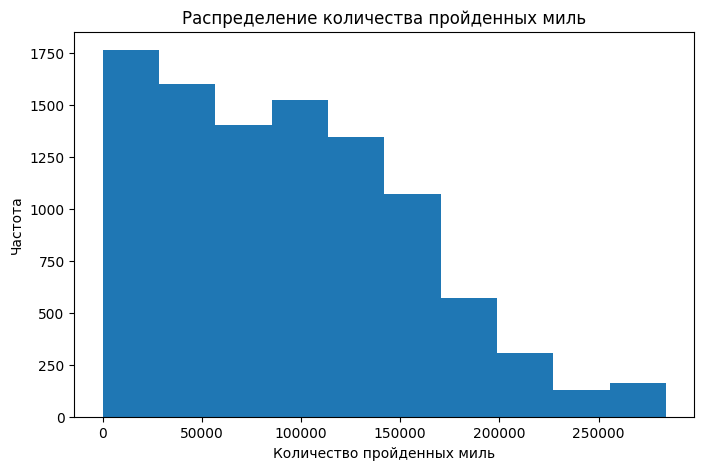

In [764]:
plt.figure(figsize=(8, 5))
plt.hist(df_out.odometer)
plt.xlabel('Количество пройденных миль')
plt.ylabel('Частота')
plt.title('Распределение количества пройденных миль');

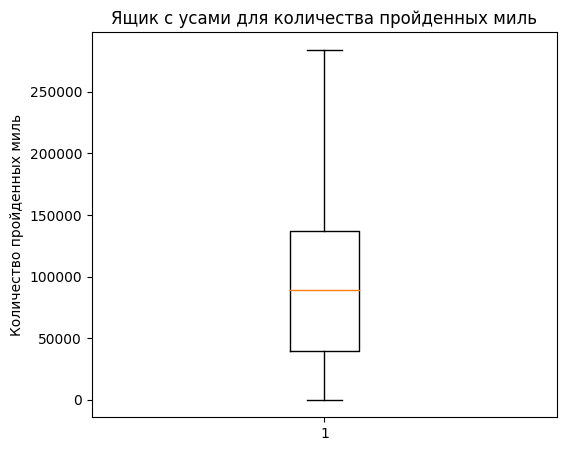

In [765]:
plt.figure(figsize=(6, 5))
plt.boxplot(df_out.odometer)
plt.ylabel('Количество пройденных миль')
plt.title('Ящик с усами для количества пройденных миль');

In [766]:
print('Статистика по признаку year')
df_out.year.describe()

Статистика по признаку year


count    9868.000000
mean     2010.909708
std         9.705988
min      1915.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

In [767]:
boundaries_year = calculate_outliers(df_out.year)
print('Диапазон нормальных значений:', boundaries_year)

Диапазон нормальных значений: (1994.5, 2030.5)


In [768]:
is_outlier_year = (df_out.year < boundaries_year[0]) | (df_out.year > boundaries_year[1])
print('Количество выбросов в столбце year:', is_outlier_year.sum())
print('Доля выбросов в столбце year:', (is_outlier_year.sum() / len(df_out) * 100).round(2), '%')

Количество выбросов в столбце year: 394
Доля выбросов в столбце year: 3.99 %


In [769]:
print('Строки с выбросами в столбце year')
df_out[is_outlier_year]

Строки с выбросами в столбце year


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category
13,7317089086,https://seattle.craigslist.org/see/ctd/d/portl...,seattle-tacoma,https://seattle.craigslist.org,14995,1994,ford,e-series van universal by glaval designer luxu...,gas,156925,clean,automatic,https://images.craigslist.org/00r0r_13JUlXZOMl...,"Priced to Sell: $14,9951994 Ford E-Series Van ...",wa,45.391373,-122.613533,2021-05-05 03:22:11+00:00,medium
21,7312327909,https://madison.craigslist.org/cto/d/madison-1...,madison,https://madison.craigslist.org,89995,1970,other,oldsmobile 442,gas,111111,clean,automatic,https://images.craigslist.org/00S0S_agk7Nol4CO...,1970 Oldsmobile 442 Convertible 442 Indy Pace ...,wi,43.098400,-89.273400,2021-04-25 15:10:43+00:00,high
57,7314413105,https://inlandempire.craigslist.org/ctd/d/cost...,inland empire,https://inlandempire.craigslist.org,69888,1948,ford,coe,gas,1,clean,automatic,https://images.craigslist.org/00M0M_8jgBCZZuG6...,Awesome Resto-Mod COE Ford Car Hauler. Equippe...,ca,33.680100,-117.908500,2021-04-29 17:49:29+00:00,high
66,7310077530,https://hudsonvalley.craigslist.org/cto/d/bloo...,hudson valley,https://hudsonvalley.craigslist.org,5500,1990,other,Diahatsu,gas,30000,clean,manual,https://images.craigslist.org/00T0T_a4VRbx40ea...,1991 Daihatsu hijet 5 speed extended cab....im...,ny,41.564400,-74.430400,2021-04-20 22:30:18+00:00,low
106,7314527175,https://rapidcity.craigslist.org/ctd/d/sherman...,rapid city / west SD,https://rapidcity.craigslist.org,43500,1968,chevrolet,camaro,gas,43320,clean,manual,https://images.craigslist.org/00h0h_2N66LMJBAI...,1968 Chevrolet Camaro Convertible. VIN:124678N...,sd,33.637200,-96.618400,2021-04-29 21:11:01+00:00,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9934,7313487583,https://springfield.craigslist.org/cto/d/mount...,springfield,https://springfield.craigslist.org,3500,1974,jeep,cj5,gas,10000,clean,manual,https://images.craigslist.org/00G0G_cdxzaTaVqa...,1974 Jeep cj5 304 v8 4speed manual trans Da...,mo,36.331200,-92.375300,2021-04-27 19:30:28+00:00,low
9969,7311566144,https://chico.craigslist.org/cto/d/chico-1994-...,chico,https://chico.craigslist.org,16000,1994,ford,f250,gas,32500,clean,automatic,https://images.craigslist.org/01010_343KkgTaHo...,"Up for sale is this 32,000 original mile Ford ...",ca,39.745800,-121.844400,2021-04-23 20:51:20+00:00,medium
9993,7313676859,https://reno.craigslist.org/ctd/d/sherman-1984...,reno / tahoe,https://reno.craigslist.org,26500,1984,chevrolet,silverado,gas,38751,clean,automatic,https://images.craigslist.org/00r0r_czXfi4UeJF...,"1984 Chevrolet C10 Silverado, short wheelbase ...",ca,33.637200,-96.618400,2021-04-28 02:44:27+00:00,high
10021,7316458200,https://portland.craigslist.org/mlt/cto/d/port...,portland,https://portland.craigslist.org,18500,1972,chevrolet,other,gas,75000,clean,automatic,https://images.craigslist.org/00x0x_7FqS8iHJst...,1972 classic Chevrolet pick up custom deluxe ...,or,45.494960,-122.666988,2021-05-03 21:58:34+00:00,medium


In [770]:
df_out[is_outlier_year].price_category.value_counts()

low       181
medium    135
high       78
Name: price_category, dtype: int64

In [771]:
import math
df_out.loc[is_outlier_year, 'year'] = int(math.ceil(boundaries_year[0]))

In [772]:
df_out.year.describe()

count    9868.000000
mean     2011.698318
std         6.425102
min      1995.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

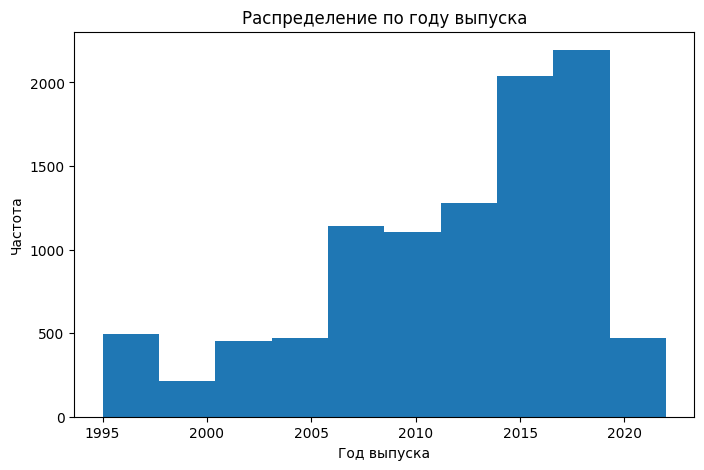

In [773]:
plt.figure(figsize=(8, 5))
plt.hist(df_out.year)
plt.xlabel('Год выпуска')
plt.ylabel('Частота')
plt.title('Распределение по году выпуска');

In [774]:
print('Статистика по признаку price')
df_out.price.describe().apply(lambda x: f"{x:0.3f}")

Статистика по признаку price


count        9868.000
mean        20602.005
std        125437.186
min           500.000
25%          7800.000
50%         15590.000
75%         27990.000
max      12345678.000
Name: price, dtype: object

In [775]:
boundaries_price = calculate_outliers(df_out.price)
print('Диапазон нормальных значений:', boundaries_price)

Диапазон нормальных значений: (-22485.0, 58275.0)


In [776]:
is_outlier_price = (df_out.price < boundaries_price[0]) | (df_out.price > boundaries_price[1])
print('Количество выбросов в столбце price:', is_outlier_price.sum())
print('Доля выбросов в столбце price:', (is_outlier_price.sum() / len(df_out) * 100).round(2), '%')

Количество выбросов в столбце price: 207
Доля выбросов в столбце price: 2.1 %


In [777]:
print('Строки с выбросами в столбце price')
df_out[is_outlier_price].sort_values('price', ascending=True)

Строки с выбросами в столбце price


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category
946,7312212565,https://lasvegas.craigslist.org/cto/d/fresno-d...,las vegas,https://lasvegas.craigslist.org,58500,2013,ram,3500 limited,diesel,57149,clean,automatic,https://images.craigslist.org/00o0o_6VEbwgYoL0...,Only 57K Miles! This 3500 RAM Truck has the 6....,nv,36.746400,-119.639700,2021-04-25 03:46:06+00:00,high
6080,7310551940,https://cincinnati.craigslist.org/ctd/d/camp-d...,cincinnati,https://cincinnati.craigslist.org,58500,2019,chevrolet,"silverado 2500hd 4wd crew cab 153.7"" ltz",other,50930,clean,automatic,https://images.craigslist.org/01010_ldls5xr3zz...,***Call Us for more information at: 513-453-41...,oh,39.171991,-84.271999,2021-04-21 21:05:31+00:00,high
4867,7308933629,https://omaha.craigslist.org/cto/d/cortland-20...,omaha / council bluffs,https://omaha.craigslist.org,58500,2008,chevrolet,corvette,gas,11000,clean,manual,https://images.craigslist.org/00P0P_kxzGxZwBY9...,2008 Corvette Z06 Wil Cooksey Edition Car nu...,ia,40.445488,-96.713695,2021-04-18 20:53:04+00:00,high
8195,7307146509,https://lubbock.craigslist.org/ctd/d/brownfiel...,lubbock,https://lubbock.craigslist.org,58600,2019,ford,f-150,gas,29458,clean,automatic,https://images.craigslist.org/00E0E_6JF7CBAVf7...,Stanley CDJR Brownfield address: 1706 Lubbo...,tx,33.196047,-102.273565,2021-04-15 13:58:48+00:00,high
1271,7313450196,https://lasvegas.craigslist.org/ctd/d/salem-20...,las vegas,https://lasvegas.craigslist.org,58670,2016,chevrolet,other,other,16407,clean,automatic,https://images.craigslist.org/00000_e7iiMwUVq3...,2016 *** Chevrolet Corvette 2LZ Z06*** ...,nv,44.927304,-123.030322,2021-04-27 18:29:39+00:00,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,7315323093,https://daytona.craigslist.org/ctd/d/orlando-2...,daytona beach,https://daytona.craigslist.org,197999,2015,other,Lamborghini Huracan,gas,33875,clean,other,https://images.craigslist.org/01717_55Ai9omMq5...,CREDIT AMNESTY! SE HABLA ESPANOL !!OPEN SUNDA...,fl,28.466088,-81.396429,2021-05-01 15:48:44+00:00,high
292,7310897583,https://tucson.craigslist.org/ctd/d/tucson-201...,tucson,https://tucson.craigslist.org,239995,2017,ferrari,488 gtb,gas,6012,clean,automatic,https://images.craigslist.org/00t0t_dN5Wr8nfOx...,2017 Ferrari 488 GTB Coupe2017 Ferrari 488 GTB...,az,32.236075,-110.878886,2021-04-22 16:38:59+00:00,high
5682,7313998757,https://winchester.craigslist.org/ctd/d/manass...,winchester,https://winchester.craigslist.org,304995,2021,porsche,911,gas,22,clean,automatic,https://images.craigslist.org/00r0r_gh2TnrNdSu...,2021 PORSCHE 911 Turbo Offered by: Insider...,va,38.762669,-77.461754,2021-04-28 19:49:25+00:00,high
9838,7305237859,https://delaware.craigslist.org/cto/d/delaware...,delaware,https://delaware.craigslist.org,1000000,2022,other,Any make any model,other,284116,clean,other,https://images.craigslist.org/00S0S_k3A68PVXRC...,We come to you and give you an easy quick tran...,de,39.572500,-75.595700,2021-04-11 17:51:42+00:00,high


In [778]:
df_out = df_out[~is_outlier_price]

In [779]:
df_out.price.describe().apply(lambda x: f"{x:0.3f}")

count     9661.000
mean     18038.316
std      12525.953
min        500.000
25%       7500.000
50%      15000.000
75%      26994.000
max      57999.000
Name: price, dtype: object

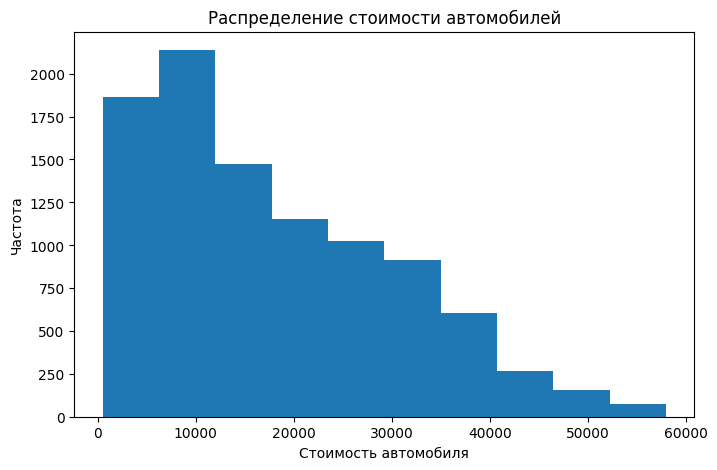

In [780]:
plt.figure(figsize=(8, 5))
plt.hist(df_out.price)
plt.xlabel('Стоимость автомобиля')
plt.ylabel('Частота')
plt.title('Распределение стоимости автомобилей');

-
-
-
-
-
-
-
-

### Аналитика и визуализация данных

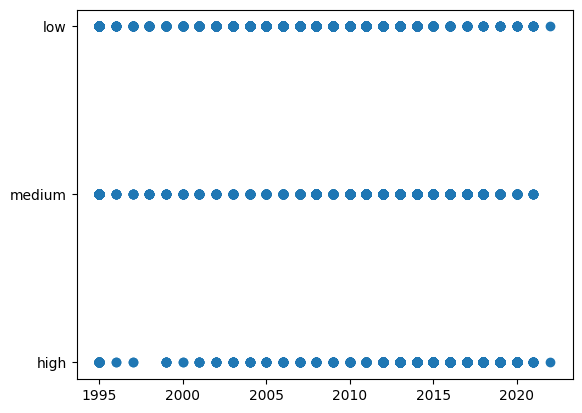

In [781]:
plt.scatter(df_out.year, df_out.price_category);

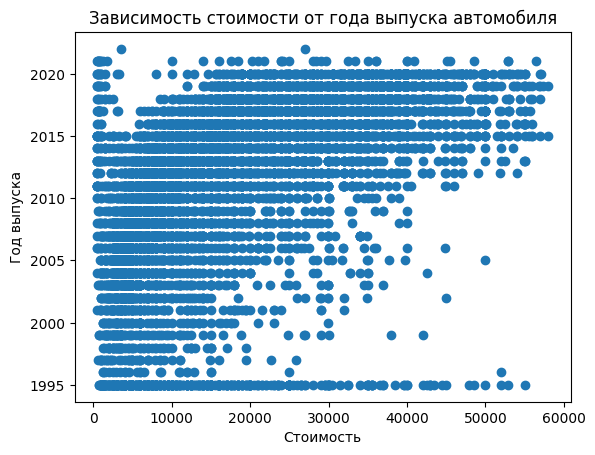

In [782]:
plt.figure()
plt.scatter(df_out.price, df_out.year)
plt.title("Зависимость стоимости от года выпуска автомобиля")
plt.xlabel('Стоимость')
plt.ylabel('Год выпуска')
plt.show();

In [783]:
print('Средние значения цен автомобилей по годам выпуска')
price_by_year = df_out.groupby(['year']).agg({'price':'mean'}).rename(columns={'price':'price_mean'})
price_by_year.round(2)

Средние значения цен автомобилей по годам выпуска


,price_mean
year,
1995,13219.47
1996,9362.96
1997,6441.25
1998,6528.67
1999,7446.64
2000,7614.41
2001,7852.09
2002,7173.80
2003,7767.96


In [784]:
print('Количество произведённых автомобилей по годам выпуска')
count_by_year = df_out.groupby(['year'], as_index=False)[['id']].count().rename(columns={'id': 'count'})
count_by_year

Количество произведённых автомобилей по годам выпуска


,year,count
0,1995,419
1,1996,25
2,1997,44
3,1998,55
4,1999,81
5,2000,78
6,2001,122
7,2002,149
8,2003,185
9,2004,208


In [785]:
df_out = df_out[df_out.year < 2021]

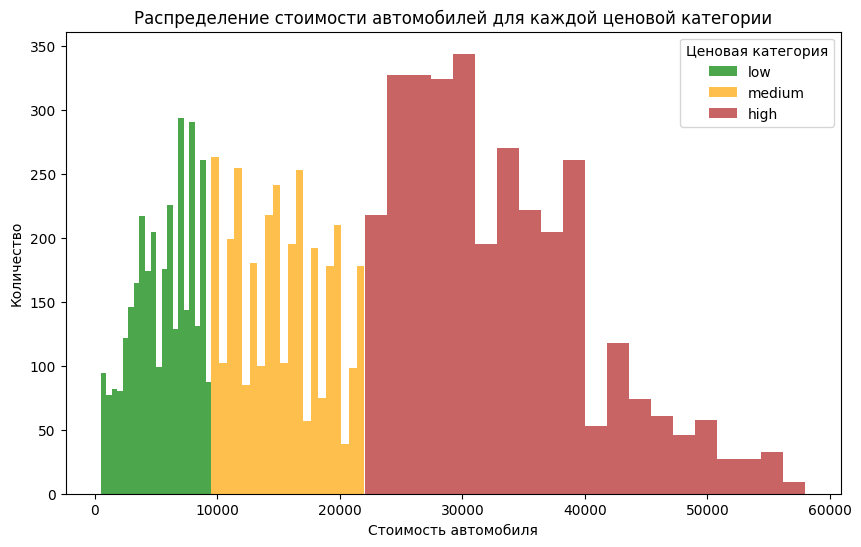

In [786]:
colors = {'low': 'green', 'medium': 'orange', 'high': 'firebrick'}

fig, ax = plt.subplots(figsize=(10, 6))
for price_category in colors:
    color = colors[price_category]
    data = df_out[df_out['price_category'] == price_category]

    ax.hist(data.price, bins=20, color=color, alpha=0.7)
    
plt.ylabel('Количество')
plt.xlabel('Стоимость автомобиля')
plt.title('Распределение стоимости автомобилей для каждой ценовой категории')
plt.legend(colors, title="Ценовая категория");

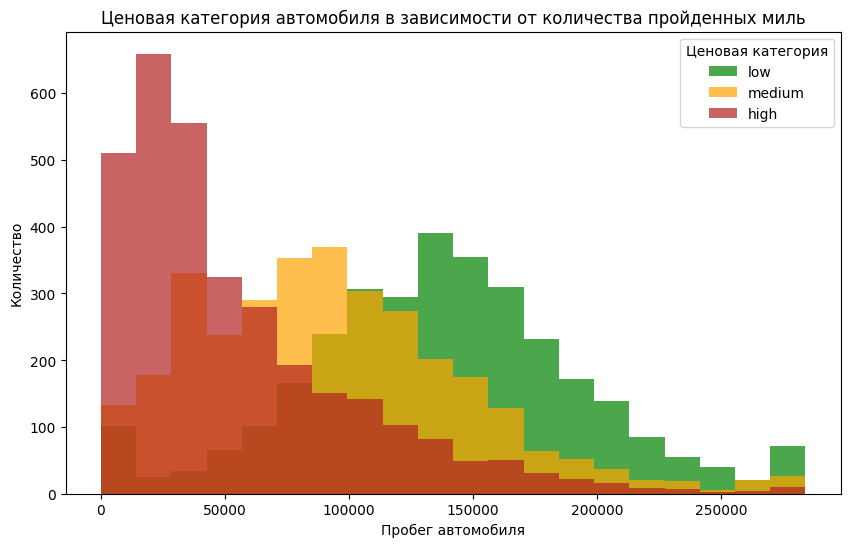

In [787]:
colors = {'low': 'green', 'medium': 'orange', 'high': 'firebrick'}

fig, ax = plt.subplots(figsize=(10, 6))
for price_category in colors:
    color = colors[price_category]
    data = df_out[df_out['price_category'] == price_category]

    ax.hist(data['odometer'], bins=20, color=color, alpha=0.7)
    
plt.ylabel('Количество')
plt.xlabel('Пробег автомобиля')
plt.title('Ценовая категория автомобиля в зависимости от количества пройденных миль')
plt.legend(colors, title="Ценовая категория");

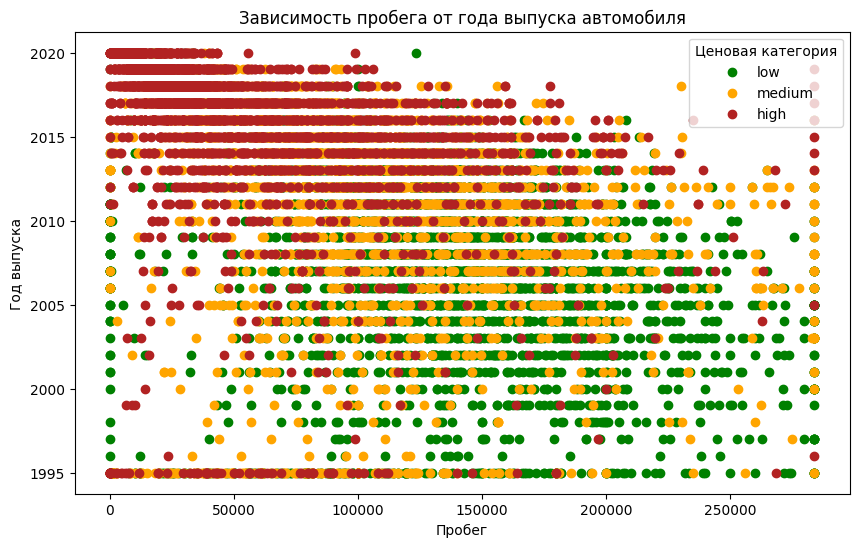

In [788]:
colors = {'low': 'green', 'medium': 'orange', 'high': 'firebrick'}
fig, ax = plt.subplots(figsize=(10, 6))
for price_category in colors:
    color = colors[price_category]
    data = df_out[df_out['price_category'] == price_category]

    ax.scatter(data['odometer'], data['year'], c=color, label=price_category)

ax.legend(loc='upper right', title="Ценовая категория")
plt.title("Зависимость пробега от года выпуска автомобиля")
plt.xlabel('Пробег')
plt.ylabel('Год выпуска')
plt.show()

In [789]:
df_out.corr().round(2)

,id,price,year,odometer,lat,long
id,1.00,-0.09,-0.10,0.05,-0.08,-0.11
price,-0.09,1.00,0.55,-0.53,-0.01,-0.05
year,-0.10,0.55,1.00,-0.50,-0.03,0.02
odometer,0.05,-0.53,-0.50,1.00,0.03,-0.00
lat,-0.08,-0.01,-0.03,0.03,1.00,-0.13
long,-0.11,-0.05,0.02,-0.00,-0.13,1.00


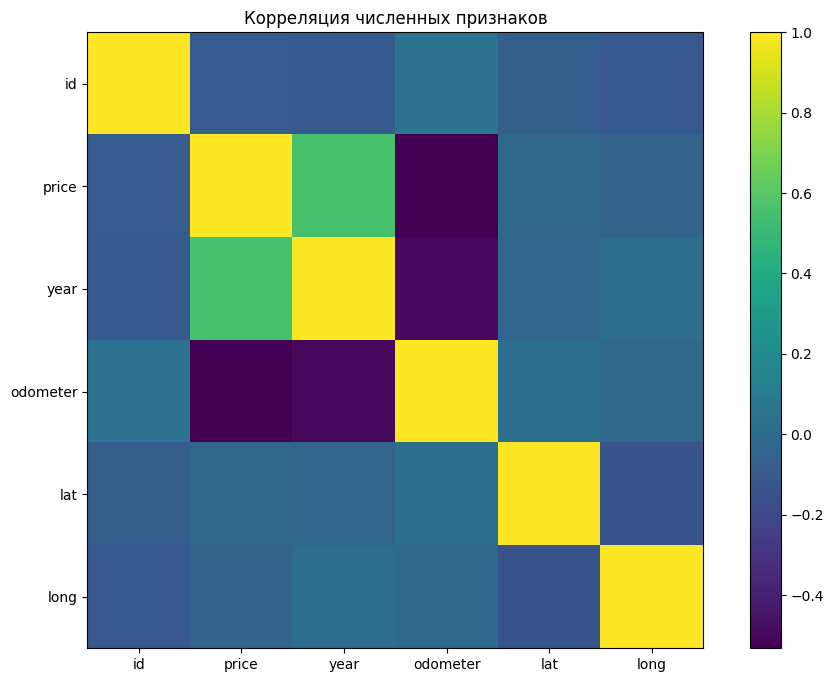

In [790]:
plt.figure(figsize=(12, 8))

columns = df_out.corr().columns.tolist()
plt.imshow(df_out.corr())

plt.title("Корреляция численных признаков")
plt.xticks(range(0, len(columns)), columns)
plt.yticks(range(0, len(columns)), columns)
plt.colorbar()
plt.show()

In [791]:
print('Распределение автомобилей по типу топлива')
stats = df_out.groupby(['fuel'], as_index=False)[['id']].count()
stats = stats.rename(columns={'id': 'count'})
stats

Распределение автомобилей по типу топлива


,fuel,count
0,diesel,558
1,electric,43
2,gas,8179
3,hybrid,103
4,other,736


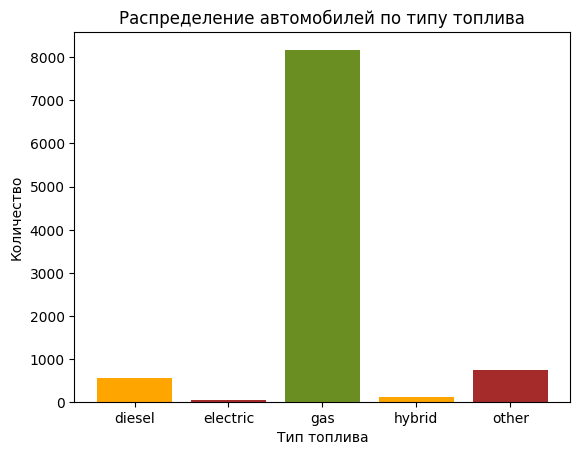

In [792]:
plt.bar(stats['fuel'], stats['count'], color=['orange', 'brown', 'olivedrab'])
plt.xlabel('Тип топлива')
plt.ylabel('Количество')
plt.title('Распределение автомобилей по типу топлива');

In [793]:
print('Распределение автомобилей по типу коробки передач')
transmission_stats = df_out.groupby(['transmission'], as_index=False)[['id']].count().rename(columns={'id': 'count'})
transmission_stats

Распределение автомобилей по типу коробки передач


,transmission,count
0,automatic,7363
1,manual,612
2,other,1644


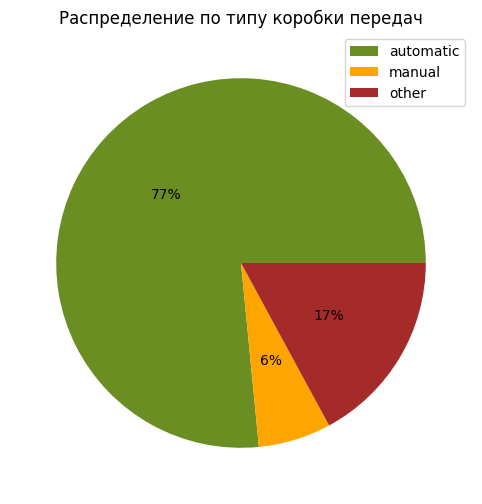

In [794]:
plt.figure(figsize=(10, 6))
plt.pie(transmission_stats['count'], labels=transmission_stats['transmission'], 
        labeldistance=None, autopct = '%1.0f%%', pctdistance=0.55,
        colors=['olivedrab', 'orange', 'brown'])
plt.title("Распределение по типу коробки передач")
plt.legend()
plt.show();

In [795]:
print('Распределение автомобилей по производителям')
manufacturer_stats = df_out.groupby(['manufacturer'], as_index=False)[['id']].count().rename(columns={'id': 'count'})
manufacturer_stats

Распределение автомобилей по производителям


,manufacturer,count
0,acura,149
1,alfa-romeo,13
2,audi,193
3,bmw,307
4,buick,144
5,cadillac,176
6,chevrolet,1239
7,chrysler,159
8,datsun,2
9,dodge,321


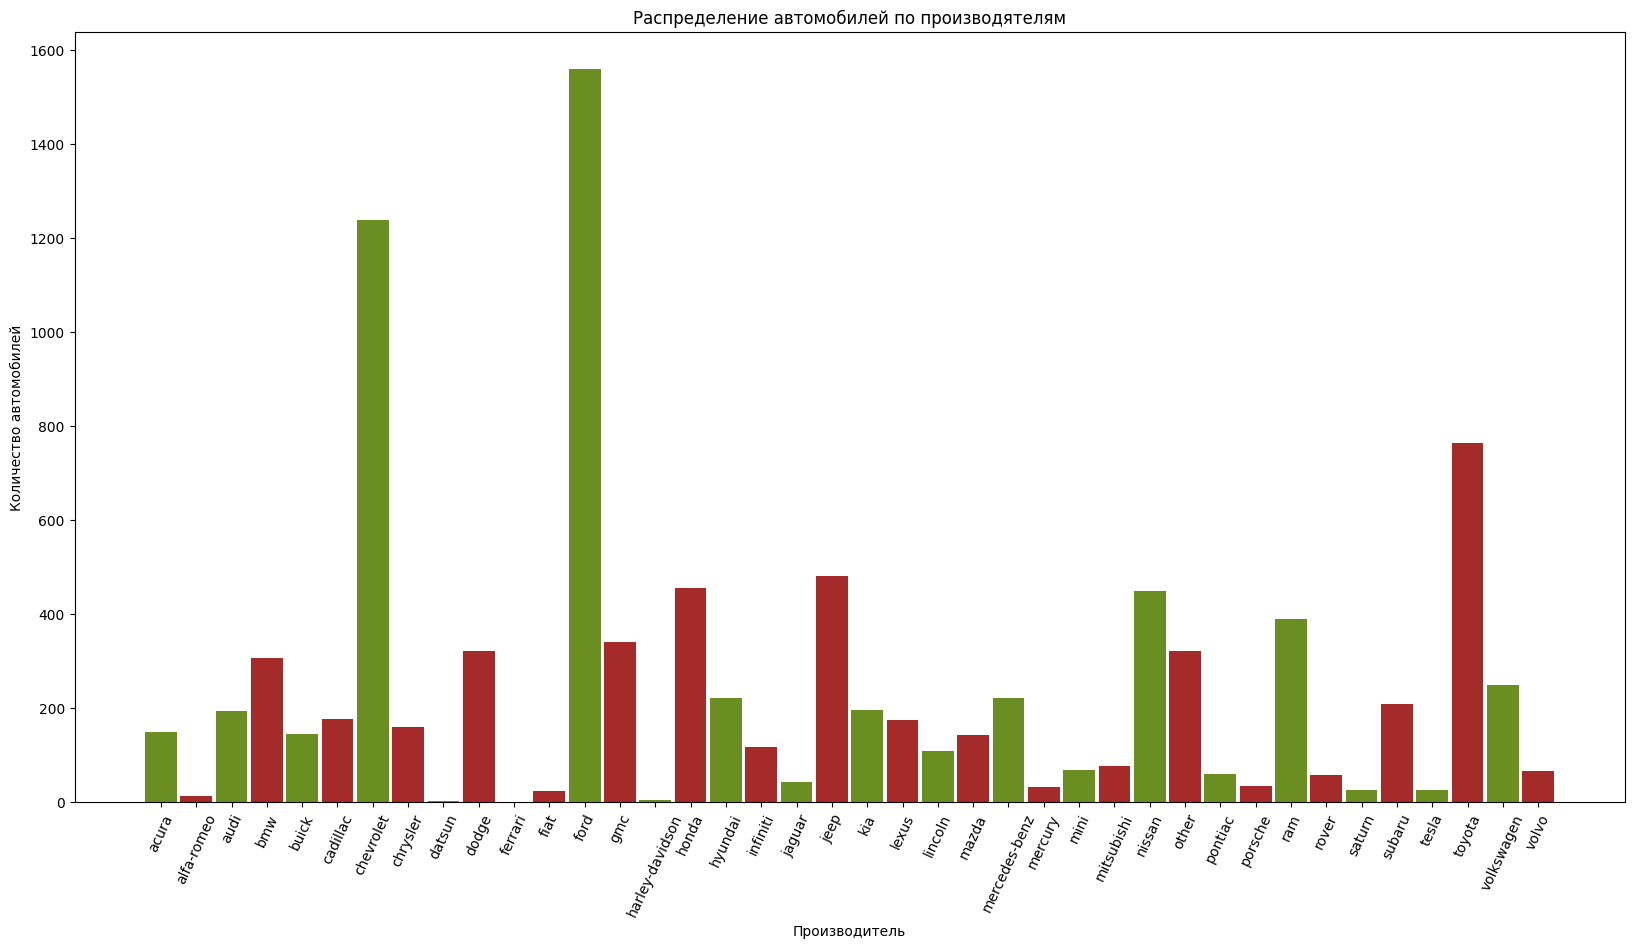

In [796]:
plt.figure(figsize=(20, 10))
plt.bar(manufacturer_stats['manufacturer'], manufacturer_stats['count'], 
        color=['olivedrab', 'brown'], width=0.9)

plt.xlabel('Производитель')
plt.xticks(rotation=65)
plt.ylabel('Количество автомобилей')
plt.title('Распределение автомобилей по производятелям');

-
-
-
-
-
-
-
-

### Преобразование и нормализация данных

In [797]:
df_new = df_out.copy()

In [798]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9619 entries, 0 to 10049
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              9619 non-null   int64              
 1   url             9619 non-null   object             
 2   region          9619 non-null   category           
 3   region_url      9619 non-null   object             
 4   price           9619 non-null   int64              
 5   year            9619 non-null   int64              
 6   manufacturer    9619 non-null   category           
 7   model           9619 non-null   object             
 8   fuel            9619 non-null   category           
 9   odometer        9619 non-null   int64              
 10  title_status    9619 non-null   category           
 11  transmission    9619 non-null   category           
 12  image_url       9619 non-null   object             
 13  description     9619 non-null   

In [802]:
print('Количество уникальных значений в признаках:')
cat_columns = ['region', 'manufacturer', 'fuel', 'title_status', 'transmission', 'state', 'price_category']
df_new[cat_columns].nunique()

Количество уникальных значений в признаках:


region            393
manufacturer       40
fuel                5
title_status        6
transmission        3
state              51
price_category      3
dtype: int64

In [803]:
from sklearn.preprocessing import OneHotEncoder

In [804]:
ohe = OneHotEncoder(sparse=False)

In [805]:
df_new['region_corrected'] = df_new['region'].apply(lambda x: x.lower().split('/')[0].replace(' ', '').replace('-', ''))
df_new['region_corrected'].nunique()

390

In [806]:
# регион
ohe.fit(df_new[['region_corrected']])
ohe_region = ohe.transform(df_new[['region_corrected']])
df_new[ohe.get_feature_names_out()] = ohe_region
df_new.iloc[:, -390:] = df_new.iloc[:, -390:].astype(int)

In [809]:
# производитель
ohe.fit(df_new[['manufacturer']])
ohe_manufacturer = ohe.transform(df_new[['manufacturer']])
df_new[ohe.get_feature_names_out()] = ohe_manufacturer
df_new.iloc[:, -40:] = df_new.iloc[:, -40:].astype(int)

In [810]:
# топливо
ohe.fit(df_new[['fuel']])
ohe_fuel = ohe.transform(df_new[['fuel']])
df_new[ohe.get_feature_names_out()] = ohe_fuel
df_new.iloc[:, -5:] = df_new.iloc[:, -5:].astype(int)
df_new.iloc[:, -5:]

,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
0,1,0,0,0,0
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,1,0,0
5,0,0,0,0,1
...,...,...,...,...,...
10045,0,0,1,0,0
10046,0,0,1,0,0
10047,0,0,1,0,0
10048,0,0,0,1,0


In [811]:
# состояние авто
ohe.fit(df_new[['title_status']])
ohe_title_status = ohe.transform(df_new[['title_status']])
df_new[ohe.get_feature_names_out()] = ohe_title_status
df_new.iloc[:, -6:] = df_new.iloc[:, -6:].astype(int)
df_new.iloc[:, -6:]

,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
5,1,0,0,0,0,0
...,...,...,...,...,...,...
10045,1,0,0,0,0,0
10046,1,0,0,0,0,0
10047,1,0,0,0,0,0
10048,1,0,0,0,0,0


In [812]:
# коробка передач
ohe.fit(df_new[['transmission']])
ohe_transmission = ohe.transform(df_new[['transmission']])
df_new[ohe.get_feature_names_out()] = ohe_transmission
df_new.iloc[:, -3:] = df_new.iloc[:, -3:].astype(int)
df_new.iloc[:, -3:]

,transmission_automatic,transmission_manual,transmission_other
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
5,0,0,1
...,...,...,...
10045,1,0,0
10046,0,0,1
10047,1,0,0
10048,1,0,0


In [813]:
# штат
ohe.fit(df_new[['state']])
ohe_state = ohe.transform(df_new[['state']])
df_new[ohe.get_feature_names_out()] = ohe_state
df_new.iloc[:, -51:] = df_new.iloc[:, -51:].astype(int)

In [654]:
df_new['price_category'].unique()

['high', 'medium', 'low']
Categories (3, object): ['high', 'low', 'medium']

In [814]:
# ценовая категория
df_new['price_category_num'] = df_new['price_category'].replace({'low': 1, 'medium': 2, 'high': 3})
df_new[['price_category', 'price_category_num']].head(10)

,price_category,price_category_num
0,high,3
1,medium,2
2,high,3
3,medium,2
5,medium,2
6,low,1
7,low,1
8,medium,2
9,medium,2
10,low,1


In [815]:
from sklearn.preprocessing import StandardScaler

In [816]:
std_scaler = StandardScaler()

In [817]:
std_scaler.fit(df_new[['odometer', 'price']])
std_scaled = std_scaler.transform(df_new[['odometer', 'price']])
df_new[['std_scaled_odometer', 'std_scaled_price']] = std_scaled

In [831]:
df_new.shape

(9619, 518)

In [825]:
df_new.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer',
       ...
       'state_ut', 'state_va', 'state_vt', 'state_wa', 'state_wi', 'state_wv',
       'state_wy', 'price_category_num', 'std_scaled_odometer',
       'std_scaled_price'],
      dtype='object', length=518)

In [829]:
columns_for_drop = ['url', 'region', 'region_url', 'price', 'manufacturer', 'model', 'fuel', 
                    'odometer', 'title_status', 'transmission', 'image_url', 'description', 
                    'state', 'region_corrected', 'price_category']
df_prepared = df_new.drop(columns=columns_for_drop)
df_prepared.columns

Index(['id', 'year', 'lat', 'long', 'posting_date', 'region_corrected_abilene',
       'region_corrected_akron', 'region_corrected_albany',
       'region_corrected_albuquerque', 'region_corrected_altoonajohnstown',
       ...
       'state_ut', 'state_va', 'state_vt', 'state_wa', 'state_wi', 'state_wv',
       'state_wy', 'price_category_num', 'std_scaled_odometer',
       'std_scaled_price'],
      dtype='object', length=503)

In [832]:
df_prepared.shape

(9619, 503)

In [837]:
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9619 entries, 0 to 10049
Columns: 503 entries, id to std_scaled_price
dtypes: category(1), datetime64[ns, UTC](1), float64(4), int64(497)
memory usage: 36.9 MB


In [839]:
df_prepared.head()

,id,year,lat,long,posting_date,region_corrected_abilene,region_corrected_akron,region_corrected_albany,region_corrected_albuquerque,region_corrected_altoonajohnstown,...,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy,price_category_num,std_scaled_odometer,std_scaled_price
0,7308295377,2020,35.060000,-85.250000,2021-04-17 16:30:50+00:00,0,0,0,0,0,...,0,0,0,0,0,0,0,3,-1.079352,2.958509
1,7316380095,2016,40.821805,-74.061962,2021-05-03 19:40:21+00:00,0,0,0,0,0,...,0,0,0,0,0,0,0,2,-0.560103,-0.085826
2,7313733749,2017,33.779214,-84.411811,2021-04-28 10:52:20+00:00,0,0,0,0,0,...,0,0,0,0,0,0,0,3,-1.292814,1.406256
3,7308210929,2013,35.715954,-78.655304,2021-04-17 14:08:57+00:00,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0.352586,-0.281218
5,7303797340,2012,35.970000,-83.940000,2021-04-08 19:10:56+00:00,0,0,0,0,0,...,0,0,0,0,0,0,0,2,-0.234316,-0.274017


-
-
-
-
-
-
-
-

In [838]:
#  Сохранение датафрейма
df_prepared.to_csv('data/df_prepared.csv', index=False)